In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


plt.style.use('ggplot')
# pd.set_option('max_columns', 200)

In [4]:
df = pd.read_csv('Salaries_Analysis.csv', index_col=[0])

C:\Users\minec\AppData\Local\Temp\ipykernel_3836\385945245.py:1: DtypeWarning: Columns (3,4,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  pd.read_csv('Salaries_Analysis.csv', index_col=[0])


,employee_name,job_title,base_pay,overtime_pay,other_pay,benefits,total_pay,total_pay_benefits,year
id,,,,,,,,,
1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011
2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011
3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,NaN,335279.91,335279.91,2011
4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.0,56120.71,198306.9,NaN,332343.61,332343.61,2011
5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737.0,182234.59,NaN,326373.19,326373.19,2011
...,...,...,...,...,...,...,...,...,...
148650,Roy I Tillery,Custodian,0.00,0.00,0.00,0.00,0.00,0.00,2014
148651,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014
148652,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014


## Pay Distribution for San Francisco Employees Years 2011 - 2014

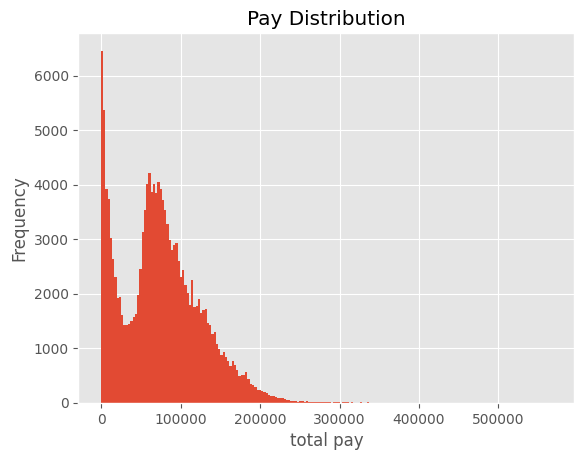

In [5]:
ax = df['total_pay'].plot(kind= 'hist', 
                    bins = 200, 
                    title= 'Pay Distribution')
ax.set_xlabel('total pay')
plt.show()

## Most Datapoints For Year 2011

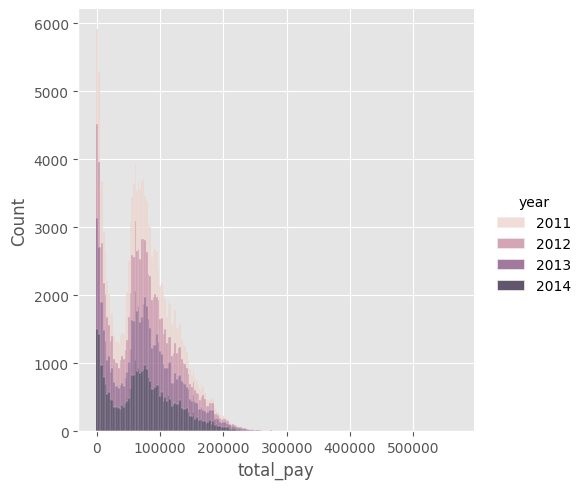

In [8]:
sns.displot(x='total_pay',
            data=df,
            hue = 'year',
            multiple='stack'
            )
plt.show()

## Fixing Column Data Types

In [10]:
df.dtypes

employee_name          object
job_title              object
base_pay               object
overtime_pay           object
other_pay              object
benefits               object
total_pay             float64
total_pay_benefits    float64
year                    int64
dtype: object

In [12]:
df.loc[df['base_pay'] == 'Not Provided'].head()

,employee_name,job_title,base_pay,overtime_pay,other_pay,benefits,total_pay,total_pay_benefits,year
id,,,,,,,,,
148647,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.0,0.0,2014
148651,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.0,0.0,2014
148652,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.0,0.0,2014
148653,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.0,0.0,2014


In [24]:

df_copy = df.copy()

df_copy[['base_pay', 'overtime_pay', 'other_pay', 'benefits']] = df_copy[['base_pay', 'overtime_pay', 'other_pay', 'benefits']].replace('Not Provided', np.nan)
df_copy[['base_pay', 'overtime_pay', 'other_pay', 'benefits']] = df_copy[['base_pay', 'overtime_pay', 'other_pay', 'benefits']].astype('float')

df_copy

,employee_name,job_title,base_pay,overtime_pay,other_pay,benefits,total_pay,total_pay_benefits,year
id,,,,,,,,,
1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011
2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011
3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011
4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011
5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011
...,...,...,...,...,...,...,...,...,...
148650,Roy I Tillery,Custodian,0.00,0.00,0.00,0.0,0.00,0.00,2014
148651,Not provided,Not provided,NaN,NaN,NaN,NaN,0.00,0.00,2014
148652,Not provided,Not provided,NaN,NaN,NaN,NaN,0.00,0.00,2014


## Salary by Occupation

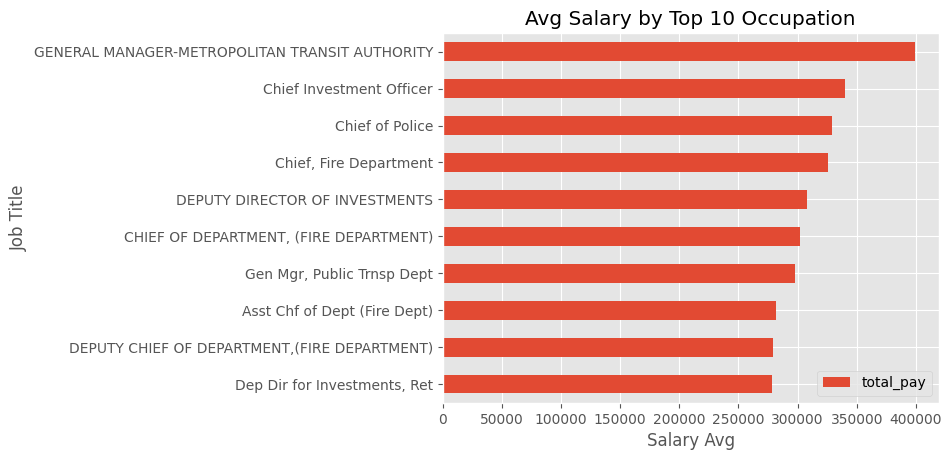

In [17]:
TotalPay_by_JobTitle = df.groupby(by= 'job_title')[['total_pay']].mean()\
                                        .sort_values(by='total_pay', ascending= False)
a = TotalPay_by_JobTitle.head(10)\
                    .plot(kind= 'barh')\
                    
a.set_title('Avg Salary by Top 10 Occupation')
a.set_xlabel('Salary Avg')
a.set_ylabel('Job Title')
a.invert_yaxis()
plt.show()

                    



## Most Common Occupation

C:\Users\minec\AppData\Local\Temp\ipykernel_3836\3774984318.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(common['job_title'], rotation = 30, ha ="right")


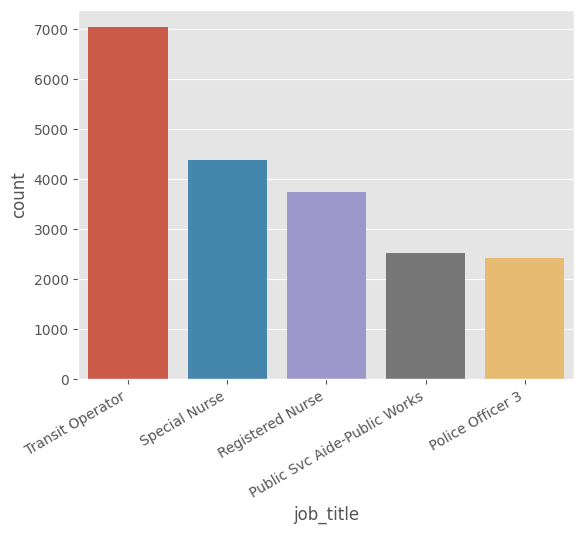

In [18]:


common= df['job_title'].value_counts().head(5).reset_index()

ax = sns.barplot(x = 'job_title',y = 'count', data = common, hue= 'job_title')

ax.set_xticklabels(common['job_title'], rotation = 30, ha ="right")

plt.show()